In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [64]:
#1 Data Collection

In [65]:
now = datetime.now()
start = datetime(now.year-10,now.month,now.day)
end = now
ticker='AAPL'
df = yf.download(ticker,start,end)
df

/tmp/ipython-input-3868217047.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker,start,end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800
2015-08-18,26.180527,26.391769,26.070412,26.164796,138242800
2015-08-19,25.845688,26.185022,25.771528,26.090638,193146000
2015-08-20,25.315332,25.697365,25.086111,25.636690,274006400
2015-08-21,23.766975,25.146790,23.742255,24.816443,513102000
...,...,...,...,...,...
2025-08-11,227.179993,229.559998,224.759995,227.919998,61806100
2025-08-12,229.649994,230.800003,227.070007,228.009995,55626200


In [66]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800
2015-08-18,26.180527,26.391769,26.070412,26.164796,138242800
2015-08-19,25.845688,26.185022,25.771528,26.090638,193146000
2015-08-20,25.315332,25.697365,25.086111,25.636690,274006400
2015-08-21,23.766975,25.146790,23.742255,24.816443,513102000


In [67]:
#2 Data Exploration and visualization

In [68]:
type(df)

pandas.core.frame.DataFrame

In [69]:
df.shape

(2515, 5)

In [70]:
df.isna().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [71]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,105.561973,106.623013,104.390678,105.460454,1.076699e+08
std,69.381288,70.063363,68.614663,69.304831,6.233907e+07
min,20.624050,20.927676,20.425436,20.546426,2.323470e+07
25%,39.803089,40.287233,39.533570,39.903957,6.558990e+07
50%,106.867081,108.934657,105.240703,106.726594,9.308720e+07
75%,166.586006,168.175077,165.063989,166.828651,1.306378e+08
max,258.103729,259.179926,256.718662,257.276679,6.488252e+08


In [72]:
df.dtypes

,,0
Price,Ticker,
Close,AAPL,float64
High,AAPL,float64
Low,AAPL,float64
Open,AAPL,float64
Volume,AAPL,int64


In [73]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800
2015-08-18,26.180527,26.391769,26.070412,26.164796,138242800
2015-08-19,25.845688,26.185022,25.771528,26.090638,193146000
2015-08-20,25.315332,25.697365,25.086111,25.636690,274006400
2015-08-21,23.766975,25.146790,23.742255,24.816443,513102000


In [74]:
df = df.reset_index()

In [75]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800
1,2015-08-18,26.180527,26.391769,26.070412,26.164796,138242800
2,2015-08-19,25.845688,26.185022,25.771528,26.090638,193146000
3,2015-08-20,25.315332,25.697365,25.086111,25.636690,274006400
4,2015-08-21,23.766975,25.146790,23.742255,24.816443,513102000


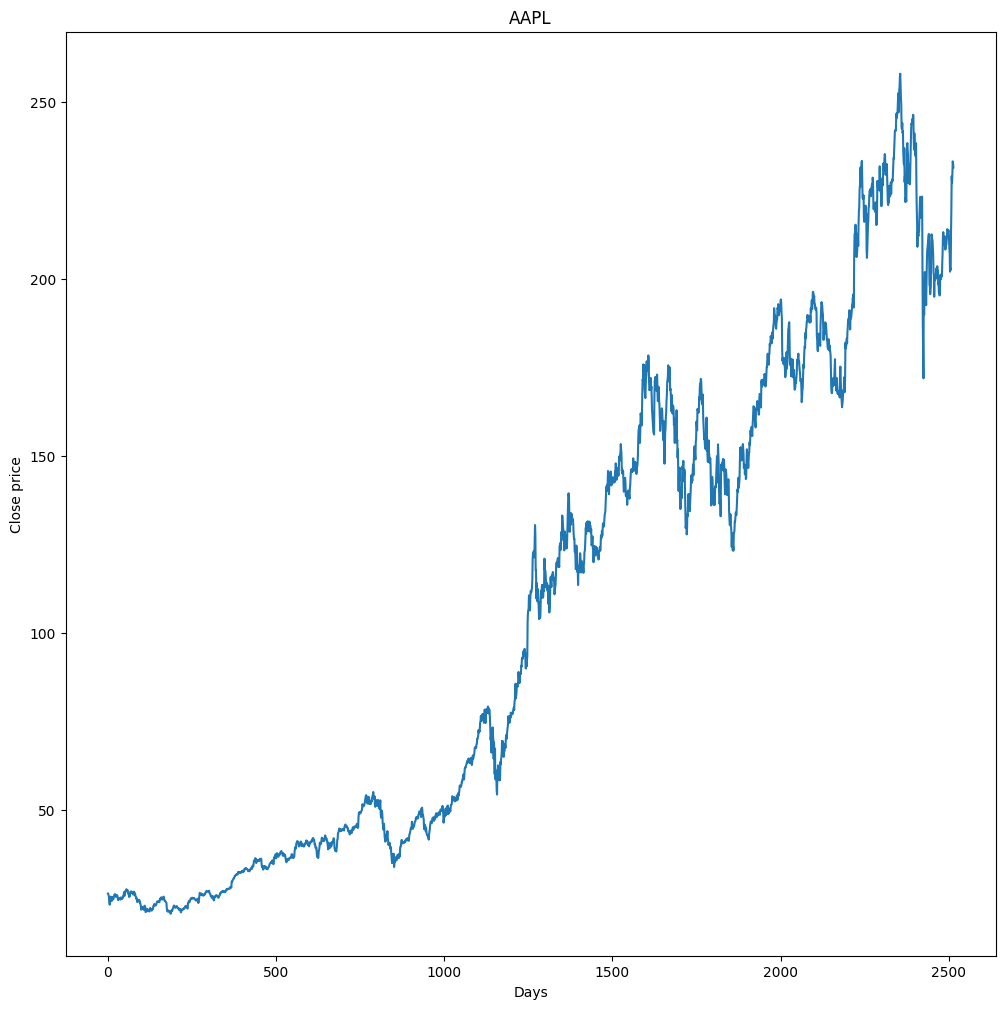

In [76]:
plt.figure(figsize=(12,12))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')
plt.show()

#3. Feature Engineering

### 100 days moving average

In [77]:
df['MA_100'] = df.Close.rolling(100).mean()

In [78]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800,NaN
1,2015-08-18,26.180527,26.391769,26.070412,26.164796,138242800,NaN
2,2015-08-19,25.845688,26.185022,25.771528,26.090638,193146000,NaN
3,2015-08-20,25.315332,25.697365,25.086111,25.636690,274006400,NaN
4,2015-08-21,23.766975,25.146790,23.742255,24.816443,513102000,NaN
...,...,...,...,...,...,...,...
98,2016-01-06,22.726730,23.103630,22.539411,22.695134,273829600,NaN
99,2016-01-07,21.767561,22.598091,21.763048,22.270845,324377600,25.467084
100,2016-01-08,21.882664,22.367892,21.837527,22.241508,283192000,25.422622


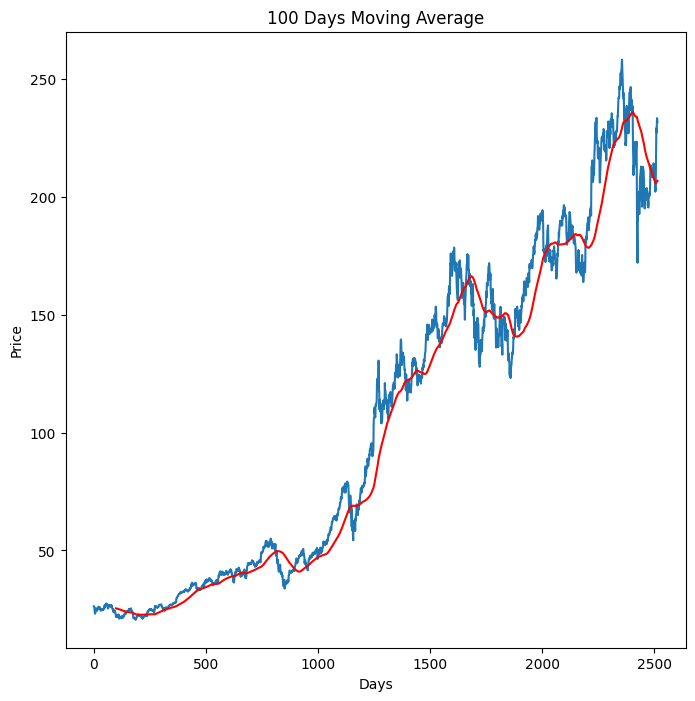

In [79]:
plt.figure(figsize=(8,8))
plt.plot(df['Close'])
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

### 200 days moving average

In [80]:
df['MA_200'] = df.Close.rolling(200).mean()

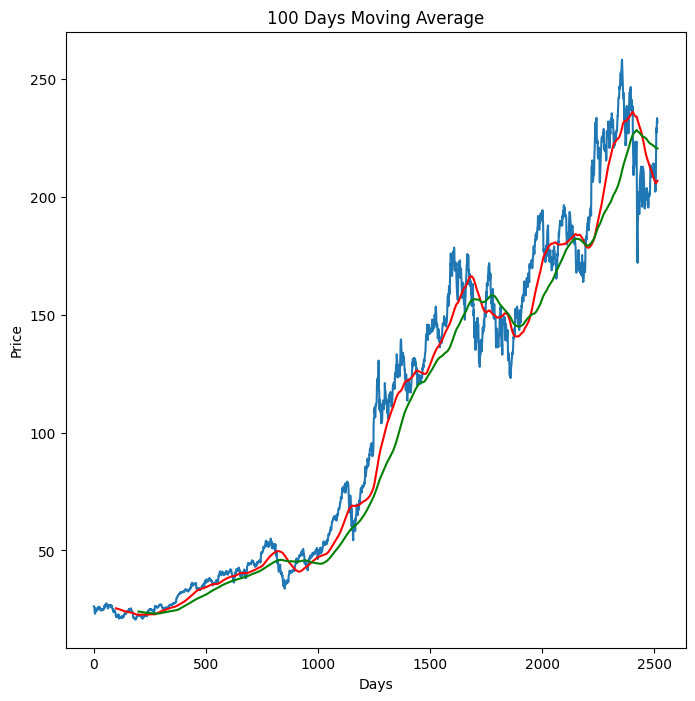

In [81]:
plt.figure(figsize=(8,8))
plt.plot(df['Close'])
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [82]:
### % Change in each trading session

In [83]:
df['percentage_change'] = df.Close.pct_change()
df[['Close','percentage_change']]

Price,Close,percentage_change
Ticker,AAPL,
0,26.328848,NaN
1,26.180527,-0.005633
2,25.845688,-0.012790
3,25.315332,-0.020520
4,23.766975,-0.061163
...,...,...
2510,227.179993,-0.008337
2511,229.649994,0.010872
2512,233.330002,0.016024


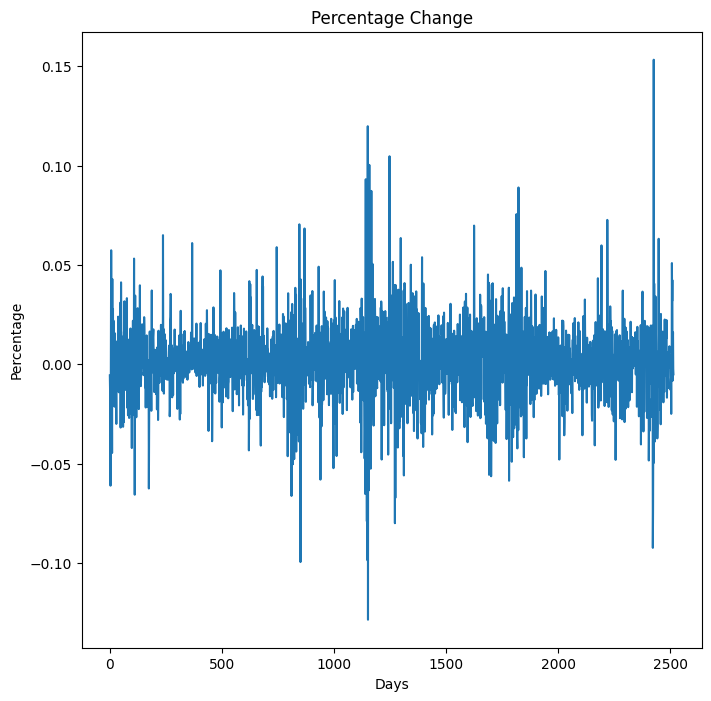

In [84]:
plt.figure(figsize=(8,8))
plt.plot(df['percentage_change'])
plt.title('Percentage Change')
plt.xlabel('Days')
plt.ylabel('Percentage')
plt.show()

#4. Data Preprocessing

In [88]:
# Split data
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [89]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [90]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03614771],
       [0.0352079 ],
       [0.03308623],
       ...,
       [0.89807334],
       [0.9250209 ],
       [0.92034269]])

#5 Sequence Creation

In [92]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

#6. Model Creation

In [93]:
import tensorflow as tf

In [94]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [96]:
model = Sequential()
model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

#7. Model Training

In [97]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step - loss: 0.0359
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - loss: 5.9342e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 185ms/step - loss: 5.5013e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - loss: 5.5878e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 4.9493e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 5.1272e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - loss: 4.7288e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - loss: 4.0070e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - loss: 4.9456e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - loss: 4.8108e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - loss: 5.6310e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - loss: 4.3816e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 210ms/step - loss: 3.8355e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - loss: 4.00

In [99]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [100]:
# Save model
model.save('stock_prediction_model.keras')

#8. Preparing Test Data

In [98]:
past_100_days = data_training.tail(100)
past_100_days

Ticker,AAPL
1660,162.345627
1661,165.722504
1662,167.087006
1663,170.876190
1664,171.514206
...,...
1755,162.780426
1756,162.307877
1757,162.357132
1758,166.609970


In [101]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,162.345627
1,165.722504
2,167.087006
3,170.876190
4,171.514206
...,...
850,227.179993
851,229.649994
852,233.330002
853,232.779999


In [102]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.89746280e-01],
       [3.14793135e-01],
       [3.24913872e-01],
       [3.53018882e-01],
       [3.57751151e-01],
       [3.64158665e-01],
       [3.88623112e-01],
       [3.79958849e-01],
       [3.56950424e-01],
       [3.54766335e-01],
       [3.84837342e-01],
       [3.60227010e-01],
       [3.36709402e-01],
       [3.38966377e-01],
       [3.24039920e-01],
       [2.92440118e-01],
       [3.06347191e-01],
       [3.26297234e-01],
       [2.89090759e-01],
       [2.87488965e-01],
       [3.04453966e-01],
       [3.03215924e-01],
       [2.97318498e-01],
       [2.63606927e-01],
       [2.71543575e-01],
       [2.27274404e-01],
       [2.25600064e-01],
       [2.77077250e-01],
       [2.33463374e-01],
       [2.35720801e-01],
       [2.46787811e-01],
       [2.94406115e-01],
       [2.27056086e-01],
       [2.32452024e-01],
       [1.94388912e-01],
       [2.12253670e-01],
       [1.53846659e-01],
       [1.25117025e-01],
       [1.58294627e-01],
       [1.46846550e-01],


In [103]:
input_data.shape

(855, 1)

In [104]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [105]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [106]:
x_test

array([[[0.28974628],
        [0.31479314],
        [0.32491387],
        ...,
        [0.28983162],
        [0.32137562],
        [0.31589944]],

       [[0.31479314],
        [0.32491387],
        [0.35301888],
        ...,
        [0.32137562],
        [0.31589944],
        [0.34225915]],

       [[0.32491387],
        [0.35301888],
        [0.35775115],
        ...,
        [0.31589944],
        [0.34225915],
        [0.35021821]],

       ...,

       [[0.66973953],
        [0.70059361],
        [0.71879519],
        ...,
        [0.78480045],
        [0.77063352],
        [0.78895393]],

       [[0.70059361],
        [0.71879519],
        [0.74114039],
        ...,
        [0.77063352],
        [0.78895393],
        [0.81624916]],

       [[0.71879519],
        [0.74114039],
        [0.72471445],
        ...,
        [0.78895393],
        [0.81624916],
        [0.81216969]]])

#9. Make Predictions

In [107]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step


In [108]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [109]:
y_test

array([169.42553711, 170.49859619, 170.34111023, 171.83746338,
       171.44367981, 168.85456848, 164.96594238, 164.63122559,
       164.92654419, 167.38771057, 161.07733154, 158.87214661,
       156.44052124, 154.77677917, 155.5052948 , 153.38865662,
       152.12857056, 153.53637695, 152.05969238, 154.92445374,
       160.89024353, 151.44929504, 152.89646912, 150.00213623,
       148.35810852, 152.07936096, 154.46176147, 151.3311615 ,
       150.36637878, 148.09230042, 148.42701721, 149.40164185,
       147.51147461, 140.26583862, 136.05235291, 140.23631287,
       143.82962036, 144.12493896, 143.17001343, 137.91297913,
       138.23782349, 136.82022095, 136.19018555, 140.76792908,
       136.22956848, 140.19694519, 141.51611328, 141.62440491,
       141.16171265, 144.98141479, 147.1275177 , 149.97262573,
       147.02908325, 142.54980469, 153.31974792, 150.95707703,
       148.30886841, 142.7762146 , 136.72180176, 136.45553589,
       136.98802185, 137.55995178, 132.99436951, 144.82

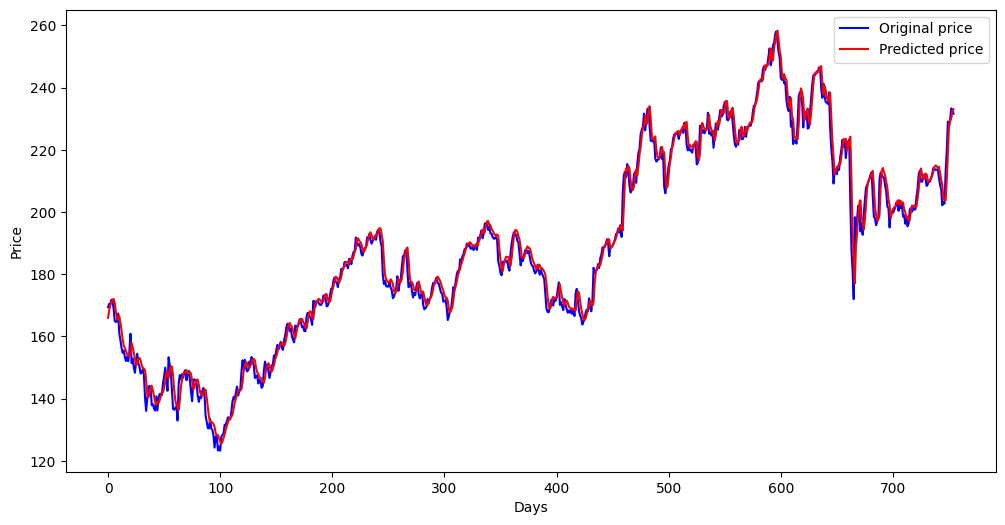

In [110]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

#10. Model Evaluation

In [118]:
# MSE
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error is: {mse}")

Mean Squared Error is: 13.332226803406552


In [119]:
# RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error is: {rmse}")

Root Mean Squared Error is: 3.651332195707007


In [120]:
# R-squared
r2 = r2_score(y_test, y_predicted)
print(f"R-squared is: {r2}")

R-squared is: 0.9862984104110842
